In [1]:
# 01_project_setup_and_eda
'''Project setup and exploratory data analysis.'''

'Project setup and exploratory data analysis.'

In [8]:
# Cell 1- Imports, plotting style, paths and small helpers
import warnings
warnings.filterwarnings("ignore")

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

PROJECT_ROOT = Path("C:/Users/KIIT/OneDrive/Documents/Labmentix/netflix")
DATA_RAW = PROJECT_ROOT / "data" / "raw" / "NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"
OUT_DIR = PROJECT_ROOT / "outputs"
OUT_DIR.mkdir(parents=True, exist_ok=True)

RANDOM_STATE = 42
print("Project root:", PROJECT_ROOT)
print("Raw CSV:", DATA_RAW.exists(), DATA_RAW)


Project root: C:\Users\KIIT\OneDrive\Documents\Labmentix\netflix
Raw CSV: True C:\Users\KIIT\OneDrive\Documents\Labmentix\netflix\data\raw\NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv


In [2]:
# Cell 2-Load the dataset (defensive)
if not DATA_RAW.exists():
    raise FileNotFoundError(f"Dataset not found at {DATA_RAW}. Place the CSV in data/raw/ as instructed.")

df = pd.read_csv(DATA_RAW)
print("Dataset loaded. Shape:", df.shape)


Dataset loaded. Shape: (7787, 12)


In [3]:
# Cell 3-Preview and basic info
display(df.head(5))
print("\nDataFrame info:")
display(df.info())


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...



DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


None

In [9]:
#  Cell 4- Missing values summary
missing = df.isnull().sum().sort_values(ascending=False)
pct_missing = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({"missing_count": missing, "missing_pct": pct_missing})
display(missing_df[missing_df["missing_count"] > 0].head(20))


,missing_count,missing_pct
director,2389,30.68
cast,718,9.22
country,507,6.51
date_added,10,0.13
rating,7,0.09


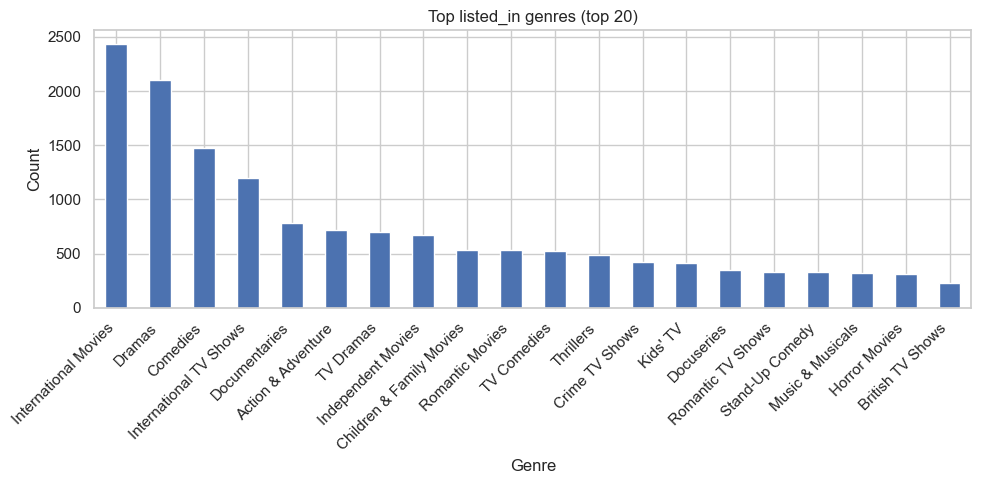

In [10]:
#Cell 5-Top genres barplot (explode listed_in)
listed = df["listed_in"].fillna("").astype(str)
genres = listed.str.split(",").explode().str.strip()
top_genres = genres.value_counts().head(20)

plt.figure(figsize=(10,5))
top_genres.plot(kind="bar")
plt.title("Top listed_in genres (top 20)")
plt.ylabel("Count")
plt.xlabel("Genre")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


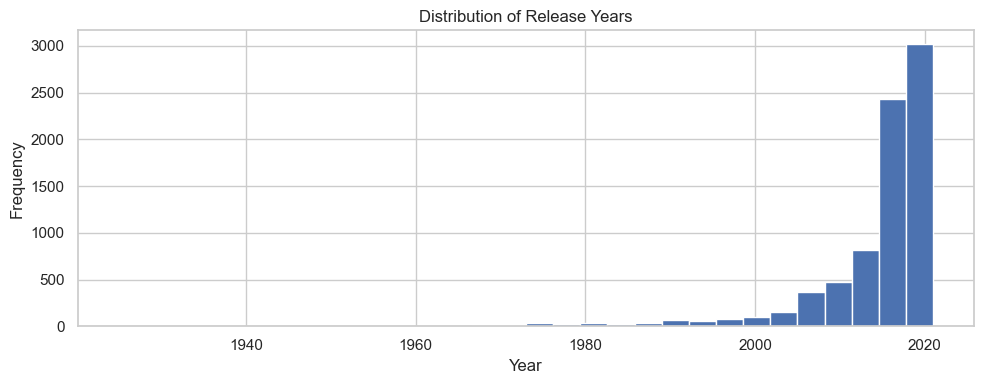

In [11]:
# Cell 6-Release year histogram (defensive)
if "release_year" in df.columns:
    plt.figure(figsize=(10,4))
    df["release_year"].dropna().astype(int).plot(kind="hist", bins=30)
    plt.title("Distribution of Release Years")
    plt.xlabel("Year")
    plt.tight_layout()
    plt.show()
else:
    print("Column 'release_year' not found.")


In [7]:
'''Clustering Netflix titles uncovers thematic groupings beyond single-genre labels. This helps with recommendations, catalog management, and editorial strategy. Our objective is to derive interpretable clusters using text descriptions, listed genres, and simple numeric metadata.'''

'Clustering Netflix titles uncovers thematic groupings beyond single-genre labels. This helps with recommendations, catalog management, and editorial strategy. Our objective is to derive interpretable clusters using text descriptions, listed genres, and simple numeric metadata.'